## Emission Line Analysis: Wavelength vs Frequency Space

This notebook provides some starter code shows to analyze emission lines from the galaxy NGC 1275.  The data provides intensity as a function of **wavelength** (in Ångströms), so we’ll work in wavelength space first, then show how to convert to frequency space.

We’ll fit a spline to the baseline, subtract it, and plot both the raw spectrum and the baseline for comparison.

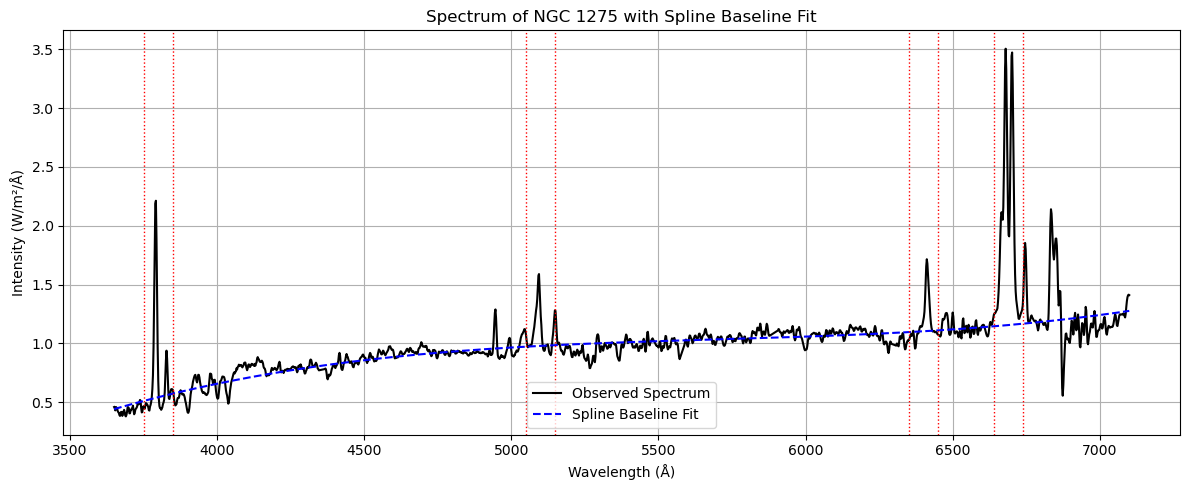

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Constants
c = 3e8  # m/s
angstrom_to_m = 1e-10

# Load the data
url = "https://raw.githubusercontent.com/NumericalMethodsSullivan/NumericalMethodsSullivan.github.io/master/data/ngc1275.csv"
data = np.array(pd.read_csv(url))
lambda_angstrom = data[:, 0]
I_lambda = data[:, 1]

# Define known emission line regions in Å (shoud change to automatic detection)
emission_windows = [
    (3750, 3850),
    (5050, 5150),
    (6350, 6450),
    (6640, 6740)
]

# Construct a mask that excludes the emission regions
mask = np.ones_like(lambda_angstrom, dtype=bool)
for start, end in emission_windows:
    mask &= ~((lambda_angstrom >= start) & (lambda_angstrom <= end))

# Fit a spline to the baseline (continuum)
spline = UnivariateSpline(lambda_angstrom[mask], I_lambda[mask], s=1e5)
baseline = spline(lambda_angstrom)

# Plot the spectrum and the baseline
plt.figure(figsize=(12, 5))
plt.plot(lambda_angstrom, I_lambda, label="Observed Spectrum", color='black')
plt.plot(lambda_angstrom, baseline, label="Spline Baseline Fit", linestyle='--', color='blue')
for start, end in emission_windows:
    plt.axvline(start, color='red', linestyle=':', linewidth=1)
    plt.axvline(end, color='red', linestyle=':', linewidth=1)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Intensity (W/m²/Å)")
plt.title("Spectrum of NGC 1275 with Spline Baseline Fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Why Stay in Wavelength Space?

The data is sampled at **evenly spaced wavelengths**, so it's straightforward to:
- Subtract the baseline
- Integrate the remaining signal under each emission peak using simple techniques (like the rectangle rule or trapezoid rule)

If the intensity is given as $I_\lambda$ (per unit wavelength), then integrating in wavelength space gives the total flux in W/m².  
This is the **standard approach** in astronomy when data is recorded this way.

## Converting to Frequency Space (Optional)

If you want to work in frequency space instead:
- Convert each wavelength λ to frequency using $\nu = \frac{c}{\lambda}$
- You also need to transform the intensity:  $I_\nu = I_\lambda \cdot \frac{\lambda^2}{c}$ (this is important so that the units of the integral (flux) remain as $W/m^2$)
- Note: Frequencies will no longer be equally spaced

So, if you integrate in frequency space, **use the trapezoid rule**, and be careful — don't assume equal spacing like you would in wavelength space.

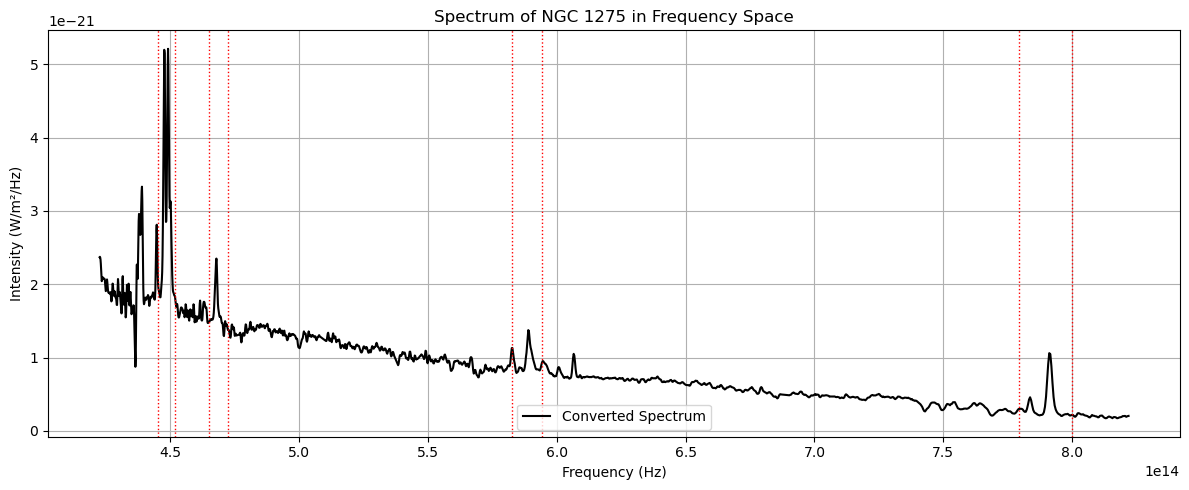

In [2]:
# Convert wavelength windows to frequency windows
freq_windows = []
for start, end in emission_windows:
    nu_max = c / (start * angstrom_to_m)
    nu_min = c / (end * angstrom_to_m)
    freq_windows.append((nu_min, nu_max))

# Convert full spectrum to frequency space
lambda_m = lambda_angstrom * angstrom_to_m
nu = c / lambda_m
I_nu = I_lambda * (lambda_m**2) / c

# Sort for plotting
sort_idx = np.argsort(nu)
nu = nu[sort_idx]
I_nu = I_nu[sort_idx]

plt.figure(figsize=(12, 5))
plt.plot(nu, I_nu, label="Converted Spectrum", color='black')
for nu_min, nu_max in freq_windows:
    plt.axvline(nu_min, color='red', linestyle=':', linewidth=1)
    plt.axvline(nu_max, color='red', linestyle=':', linewidth=1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity (W/m²/Hz)")
plt.title("Spectrum of NGC 1275 in Frequency Space")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

📌 **Key point**: Stick with wavelength space unless you have a specific reason to switch. 
It's more natural for this dataset and avoids unnecessary complexity.

**Note:**  In this starter version we've manually identified the peaks, and not perfectly at that.  You should try to automate the peak detection and compute the flux for each peak (emission line).